# Model K-Means (vinos)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv('caracteristicas de vinos.csv')
df.head(2)

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [4]:
df.info() # vemos si todos los datos estan completos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,89.500000,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,51.528309,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,45.250000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,89.500000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,133.750000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,178.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Normalizamos las variables (las empearejamos entre 0 y 1)

In [6]:
df_normal=(df-df.min())/(df.max()-df.min())## quedaran todos los min= 0 y los max=1
df_normal.describe()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.00000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.50000,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.29112,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.50000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.75000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Busqueda optima de Clusters


- Calculamos que tan similares son los individuos de cada clusters

In [7]:
from sklearn.cluster import KMeans

wcss=[]
for x in range(1,11):
    k_m=KMeans(n_clusters=x,max_iter=300)
    k_m.fit(df_normal)
    wcss.append(k_m.inertia_)
    

C:\Users\lali y martin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Codo de jambu (para ver cant optima de Clusters)

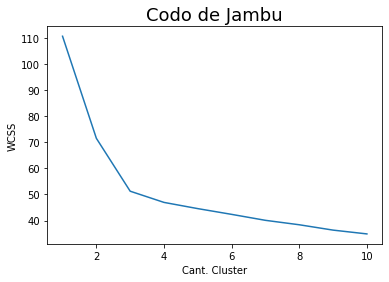

In [9]:
plt.plot(range(1,11),wcss)
plt.title('Codo de Jambu',fontsize='18')
plt.xlabel('Cant. Clusters')
plt.ylabel('WCSS')
plt.show()

- Como se ve en el grafico la cantidad justa de Clusters es 3 (justo antes que la cantidad de "wcss" empieza caer drasticamente)

In [12]:
#aplicamos el modelo pero con la cantidad ideal 3
clustering=KMeans(n_clusters=3,max_iter=300)
clustering.fit(df_normal)

KMeans(n_clusters=3)

In [60]:
df['Clusters']=clustering.labels_
df.head(2)

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2


In [12]:
df['Clusters'].value_counts()# vemos la cantidad de individuos dentro de los tres grupos.

2    68
0    60
1    50
Name: Clusters, dtype: int64

# Analisis de componentes principales PCA

In [14]:
from sklearn.decomposition import PCA

# elegimos 2 componentes principales para plot en "2d"
pca=PCA(n_components=2)
pca_vinos=pca.fit_transform(df_normal)

# armamos Dataframe para evaluar el modelos en el plot 
pca_df=pd.DataFrame(data=pca_vinos,columns=['Comp_1','Comp_2'])

# unimos el df (2 componentes) con la columna 'Clusters'
pca_df_plot=pd.concat([pca_df,df[['Clusters']]], axis=1)
pca_df_plot.head()

,Comp_1,Comp_2,Clusters
0,0.864955,-0.246505,2
1,0.676158,-0.011751,2
2,0.692172,-0.186686,2
3,0.955057,-0.568299,2
4,0.411640,-0.067685,2


## Plotting

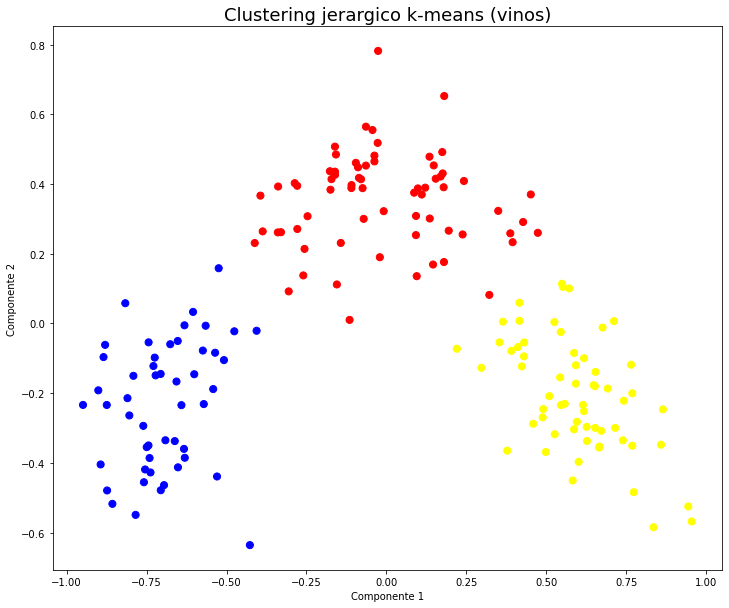

In [69]:
fig=plt.figure(figsize=(12,10))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Clustering jerargico k-means (vinos)',fontsize='18')
color=np.array(['red', 'blue','yellow'])
A=ax.scatter(x=pca_df_plot.Comp_1, y=pca_df_plot.Comp_2, c=color[pca_df_plot.Clusters], s=50)
plt.show()


- Podemos ver los tres Clusteres bien marcados en el plot, podemos decir que el metodo funciono bien. 